In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.model_selection import validation_curve

In [2]:

data = pd.read_csv('../input/telecom_churn.csv').drop('State', axis=1)
data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})
data['Voice mail plan'] = data['Voice mail plan'].map({'Yes': 1, 'No': 0})

y = data['Churn'].astype('int').values
X = data.drop('Churn', axis=1).values

In [3]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [4]:
X

array([[128.  , 415.  ,   0.  , ...,   3.  ,   2.7 ,   1.  ],
       [107.  , 415.  ,   0.  , ...,   3.  ,   3.7 ,   1.  ],
       [137.  , 415.  ,   0.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 28.  , 510.  ,   0.  , ...,   6.  ,   3.81,   2.  ],
       [184.  , 510.  ,   1.  , ...,  10.  ,   1.35,   2.  ],
       [ 74.  , 415.  ,   0.  , ...,   4.  ,   3.7 ,   0.  ]])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int64
Voice mail plan           3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64
Churn                     3333 non-null bool
dtyp

In [13]:
alphas = np.logspace(-2, 0, 20)
sgd_logit = SGDClassifier(loss='log', n_jobs=-1, random_state=17)
logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2)), 
                       ('sgd_logit', sgd_logit)])
val_train, val_test = validation_curve(logit_pipe, X, y,
                                       'sgd_logit__alpha', alphas, cv=5,
                                        scoring='roc_auc')

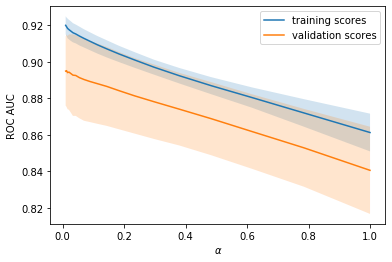

In [14]:

def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(alphas, val_train, label='training scores')
plot_with_err(alphas, val_test, label='validation scores')
plt.xlabel(r'$\alpha$'); plt.ylabel('ROC AUC')
plt.legend();